# Scikit-learn

In [69]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler,QuantileTransformer,PolynomialFeatures,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score,make_scorer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
cali =fetch_california_housing(as_frame = True)

X= cali.data  # features
y=cali.target # house prices


In [5]:
X.shape

(20640, 8)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [7]:
# First create the OBJECT

model = KNeighborsRegressor()

model.fit(X,y)

KNeighborsRegressor()

In [8]:
# making a pipeline

# list of tuples , pair of a name and step

pipe = Pipeline([
    ('scale', StandardScaler(),),
    ('Model', KNeighborsRegressor())
])

In [9]:
pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()), ('Model', KNeighborsRegressor())])

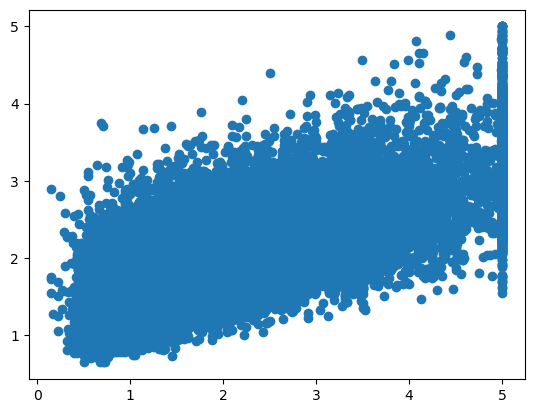

In [10]:
pred = model.predict(X)

plt.scatter(y,pred)    # differente values of what i predict 

### A lot of noise and maybe some correlation

KNeighborsRegressor checks for the nearest 5 points and with the mean of it, decides and make the prediction
Thins to consider : 

1. The columns in X can have a very different scale and this can impact the prevision, ex distance in km and area in square feat . So both axes will have different behaviors. This means that maybe because of the scaling, one feature can have way more impact in the prevision than i want
2. A pipeline can be very useful to use for a large quantity of data and used in this process

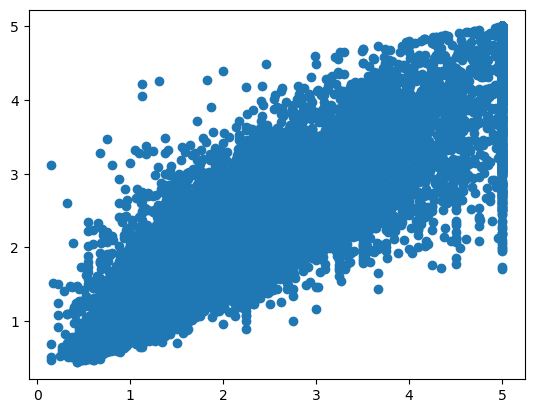

In [11]:
with_scaling = pipe.predict(X)

plt.scatter(y,with_scaling)

### Looks like picking the same model but doing a SCALING before the model, really makes a difference with less noise

But now there is a new problem : We are learning from the SAME DATA we are judging !!! it is like making a test with questions that we had already seen before, exatcly the sames

-> this changes the model into too optimistic

Changing the model of KN to see only ONE neighboor , things change

In [12]:
pipe = Pipeline([
    ("scaling", StandardScaler()),
    ("Modeling", KNeighborsRegressor(n_neighbors=1))
])

pipe.fit(X,y)

Pipeline(steps=[('scaling', StandardScaler()),
                ('Modeling', KNeighborsRegressor(n_neighbors=1))])

In [13]:
pipe.get_params()

{'memory': None,
 'steps': [('scaling', StandardScaler()),
  ('Modeling', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scaling': StandardScaler(),
 'Modeling': KNeighborsRegressor(n_neighbors=1),
 'scaling__copy': True,
 'scaling__with_mean': True,
 'scaling__with_std': True,
 'Modeling__algorithm': 'auto',
 'Modeling__leaf_size': 30,
 'Modeling__metric': 'minkowski',
 'Modeling__metric_params': None,
 'Modeling__n_jobs': None,
 'Modeling__n_neighbors': 1,
 'Modeling__p': 2,
 'Modeling__weights': 'uniform'}

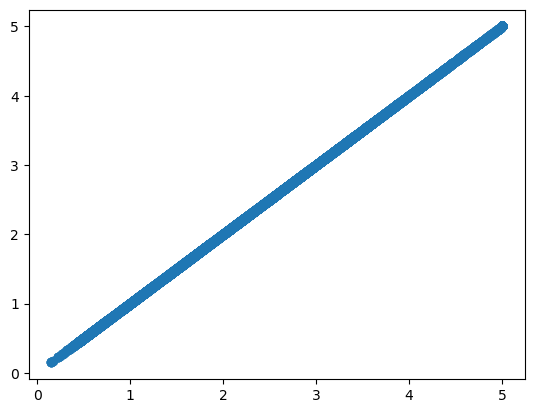

In [14]:
new_scale = pipe.predict(X)

plt.scatter(y,new_scale)

### Of course !! They use the same data for training and evaluating . Thus it considers the data itself and knows the answer. it memorizes the original data. -> -> OVERFITING

We want to predict data not seen before 

In [15]:
# turn the pipeline into a GridSearchCV

# estimator has a fit and predict method
# param - all the settings i want to change, as n_neighbors and KneighborsRegressor
# 'Modeling__n_neighbors': 1,
# cv = cross validation

mod = GridSearchCV( estimator=pipe,
                    param_grid= {'Modeling__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
                    cv=3)

In [16]:
mod.fit(X,y)

# We have all the settings here

# for every cross validation i can check it 
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Modeling__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004185,0.000681,0.096019,0.006231,1,{'Modeling__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.003853,0.000077,0.108550,0.007595,2,{'Modeling__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.003441,0.000197,0.113971,0.009018,3,{'Modeling__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.003313,0.000152,0.121094,0.009417,4,{'Modeling__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.003452,0.000231,0.126123,0.009461,5,{'Modeling__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.003225,0.000117,0.131069,0.009436,6,{'Modeling__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.003414,0.000180,0.134634,0.008377,7,{'Modeling__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.003413,0.000161,0.144570,0.008663,8,{'Modeling__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.003344,0.000140,0.143010,0.008831,9,{'Modeling__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.003443,0.000133,0.146529,0.010604,10,{'Modeling__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1


# Preprocessing

In [17]:
# just some random data to work with and try to predict 'a'
draw_data = {'x' : [52.3040,260.3012,120.7603], 
             'y': [280.1020,220.2304,302.3020], 
             'z' : ['a','a','a']}

# i will transform it to a df to work better
df = pd.DataFrame(draw_data)

In [18]:
df.head()

,x,y,z
0,52.3040,280.1020,a
1,260.3012,220.2304,a
2,120.7603,302.3020,a


In [19]:
# Features X and goal Y

X = df[['x','y']].values
y = df['z'] == 'a'

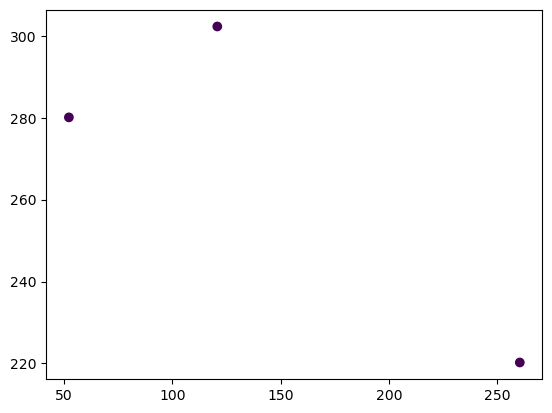

In [20]:
# what this dataset looks like

plt.scatter(X[:,0],X[:,1],c=y) 

# c = y will color the dots that represent the class value of the point 

In [21]:
# There are not enough numbers on this dataset, i will use a csv

df = pd.read_csv('drawndata1.csv')
df.head()

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a


In [22]:
X = df[['x','y']].values    # Features used
y= df['z'] == 'a'           # True and false

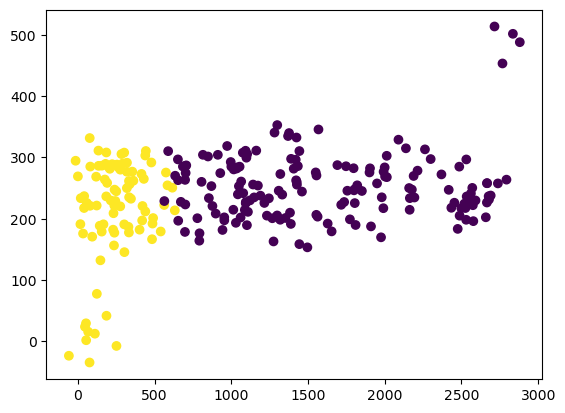

In [23]:
plt.scatter(X[:,0],X[:,1], c=y)
# c = y makes the map with colours based on true and false

In [24]:
# X and Y are in totally different scales and this will impact the forecast

X_scaled = StandardScaler().fit_transform(X)

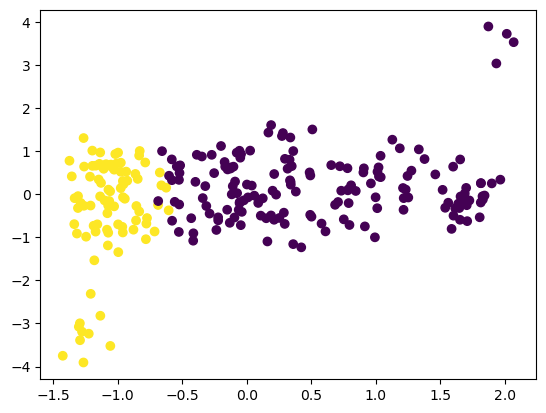

In [25]:
plt.scatter(X_scaled[:,0],X_scaled[:,1], c=y)


### Now both axis have similar numbers. But y has 8 units and X has 3,5 units !!

The outliers are still there. Maybe there is another way of scaling this


(array([  7., 119., 161., 137., 105.,  97.,  77.,  54.,  51.,  45.,  30.,
         25.,  20.,  16.,  17.,   8.,   5.,   1.,   7.,   1.,   6.,   1.,
          3.,   1.,   2.,   0.,   0.,   0.,   3.,   1.]),
 array([-3.27347981, -1.08473515,  1.10400951,  3.29275417,  5.48149883,
         7.67024349,  9.85898815, 12.04773281, 14.23647746, 16.42522212,
        18.61396678, 20.80271144, 22.9914561 , 25.18020076, 27.36894542,
        29.55769008, 31.74643474, 33.9351794 , 36.12392406, 38.31266872,
        40.50141338, 42.69015804, 44.8789027 , 47.06764736, 49.25639201,
        51.44513667, 53.63388133, 55.82262599, 58.01137065, 60.20011531,
        62.38885997]),
 <BarContainer object of 30 artists>)

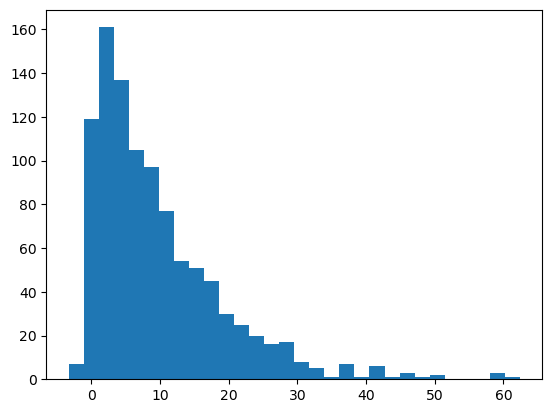

In [26]:
# Generates 1000 random points from an exponential distribution of mean 10
# Generates 1000 points from a gaussian with mean 0 and std = 1

# So i am taking the exp distribution and adding some noise from the Gaussian
scale_test = np.random.exponential(10,(1000)) + np.random.normal(0,1,(1000))

# Histogram of 30 bins from this noisy values
plt.hist(scale_test,30)

### What if i normalize the values of the exponential 

(array([  7., 119., 161., 137., 105.,  97.,  77.,  54.,  51.,  45.,  30.,
         25.,  20.,  16.,  17.,   8.,   5.,   1.,   7.,   1.,   6.,   1.,
          3.,   1.,   2.,   0.,   0.,   0.,   3.,   1.]),
 array([-1.35904398, -1.1298187 , -0.90059343, -0.67136816, -0.44214289,
        -0.21291762,  0.01630765,  0.24553293,  0.4747582 ,  0.70398347,
         0.93320874,  1.16243401,  1.39165928,  1.62088456,  1.85010983,
         2.0793351 ,  2.30856037,  2.53778564,  2.76701091,  2.99623619,
         3.22546146,  3.45468673,  3.683912  ,  3.91313727,  4.14236254,
         4.37158781,  4.60081309,  4.83003836,  5.05926363,  5.2884889 ,
         5.51771417]),
 <BarContainer object of 30 artists>)

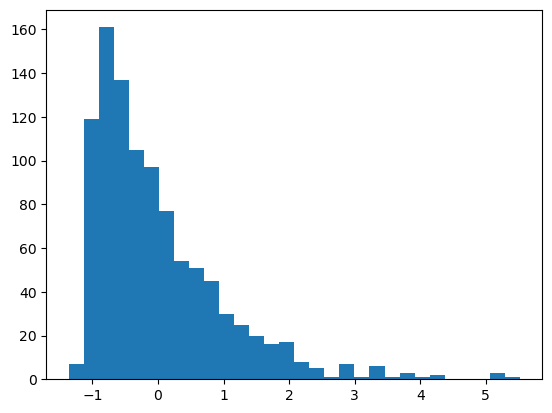

In [27]:
plt.hist((scale_test - np.mean(scale_test))/np.std(scale_test),30)

### Now the numbers of x -axis are scaled but i still have outliers . Outliers make it all harder


when we normalize the distance from the outlier to the quantile is much smaller -> By using quantiles instead of sdv,i can get a more robust preprocessing if there are outliers there 

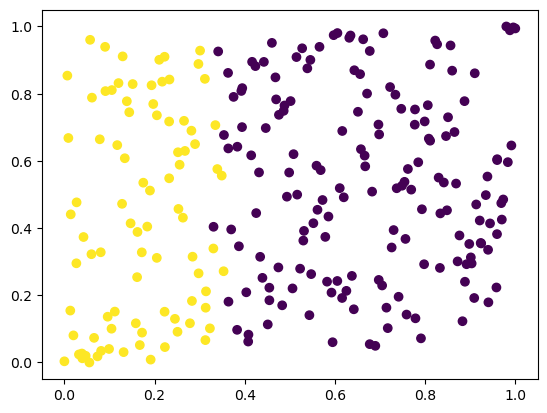

In [28]:
X_quantile= QuantileTransformer(n_quantiles= 100).fit_transform(X) # on the features !!
plt.scatter(X_quantile[:,0], X_quantile[:,1] , c=y)

Both axis are between 0 and 1 , and the clusters are still on the data but they do not have the same effect because i am using Quantiles to  transform and scale

Now it would be interesting to see the difference of these transformations

In [29]:
# I will now make a pipeline to understand the difference of these transformations

def plot_trans(scaler):
    pipe =Pipeline([
        ('scale', scaler),
        ('model', KNeighborsClassifier(n_neighbors=20 ,weights ='distance'))

    ])

    prediction = pipe.fit(X,y).predict(X)

    # Original data

    # To plot the 3 graphs i will make one row and 3 axes (columns)
    fig,axes = plt.subplots(1,3,figsize = (15,4))

    axes[0].scatter(X[:,0], X[:,1], c=y)
    axes[0].set_title ("Initial Data")

    # Transformed
    X_transform = scaler.transform(X)
    axes[1].scatter(X_transform[:,0], X_transform[:,1], c=y)
    axes[1].set_title("Transformed Data")

    # Forecast data 
    # i need to create some new data from both columns "axis = 1" because of the columns
    # unseen data and predict probabilities of the class of regions
    # Hence, i can create 10 000 random points from 0 to the max of EACH column
    rand_numbers =np.concatenate((
                            np.random.uniform(0,X[:,0].max(), (10000,1)),
                            np.random.uniform(0,X[:,1].max(), (10000,1))), 
                            axis=1)
    
    
    forecast = pipe.predict_proba(rand_numbers)
    axes[2].scatter(rand_numbers[:,0], rand_numbers[:,1], c=forecast[:,1], alpha = 0.5)
    axes[2].set_title(" Predicted Data")

    for ax in axes:
        ax.set_xlabel('x')
        ax.set_ylabel('y')

    plt.show()



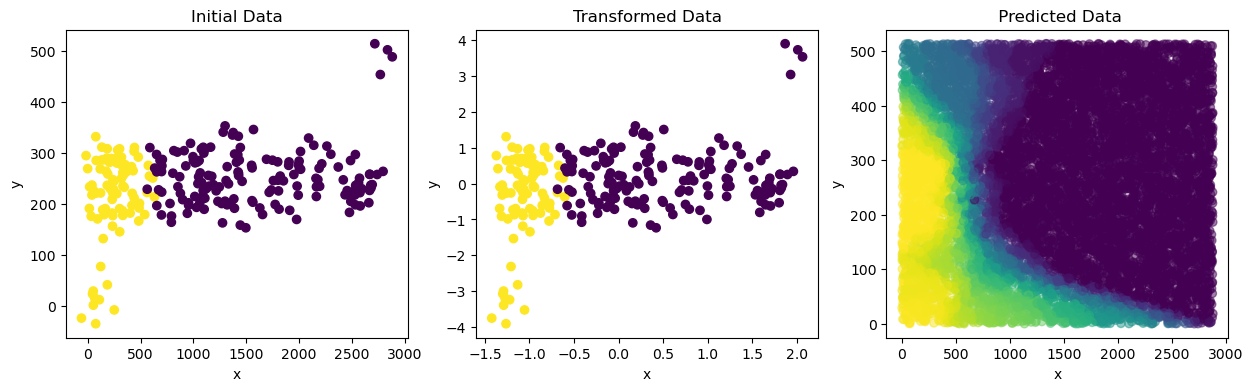

In [30]:
plot_trans(scaler=StandardScaler())

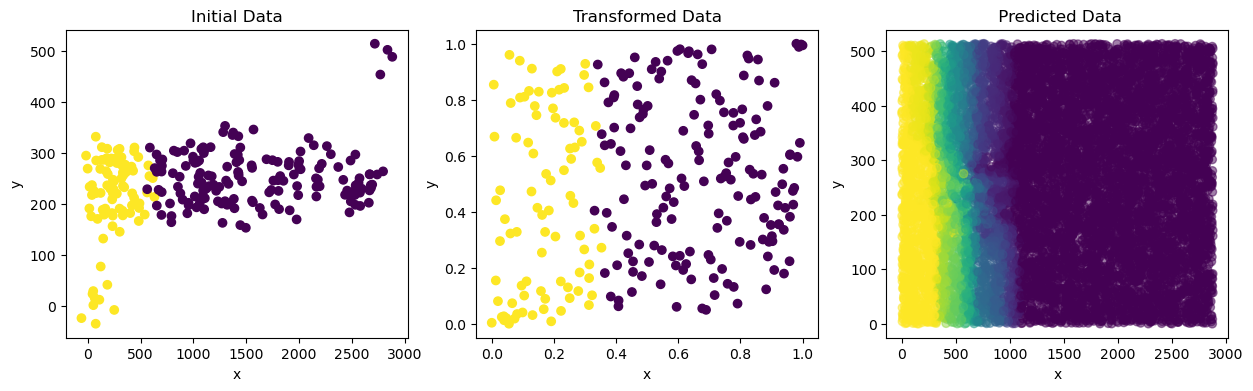

In [31]:
plot_trans(scaler= QuantileTransformer(n_quantiles=100))

### With this i can see the difference of an outlier comparing the 2 pre processing forms !!

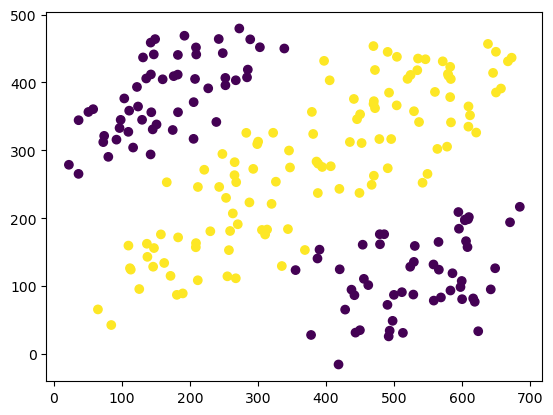

In [32]:
# now a dataset that is not separable
df = pd.read_csv('drawndata2.csv')
X = df[['x','y']].values
y = df['z'] == 'a'
plt.scatter(X[:,0] , X[:,1] , c=y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (217). n_quantiles is set to n_samples.
  warnings.warn(


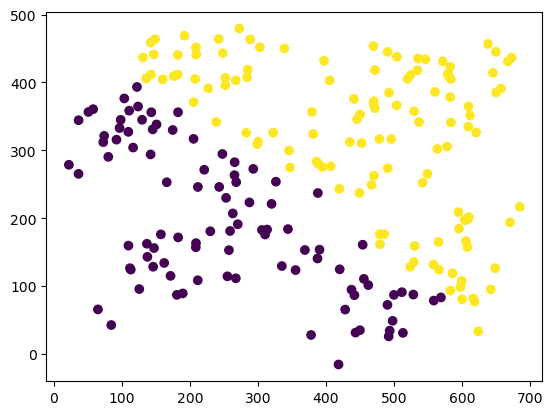

In [33]:
# let me see if i can separate this

pipe = Pipeline([
        ('scale', QuantileTransformer()),
        ('model', LogisticRegression())
])

pred =pipe.fit(X,y).predict(X)

plt.scatter(X[:,0], X[:,1], c=pred)

# Now pred will determine what will be true

### Logistic regression separated into 2 classes . but it is a poor aproximation since there are groups that should still maintain the same and the line should not separate like this

Logistic regression gets features such as X1, X2 , X1*X2, X1^2 , X2^2 . We can use the linear features to non linear features . So let's add the non linear features and see the impact

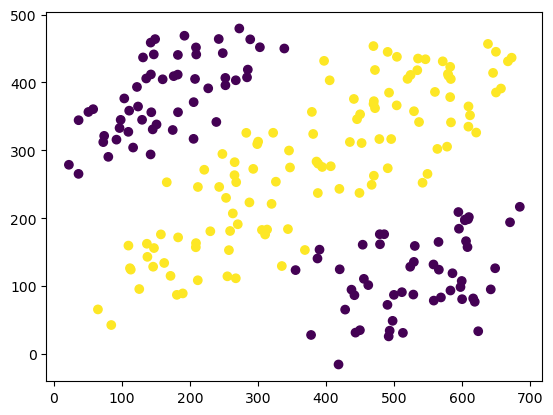

In [34]:
pipe = Pipeline([
    ("Scale" , PolynomialFeatures()),
    ("Model", LogisticRegression())
])

pred = pipe.fit(X,y).predict(X)

plt.scatter(X[:,0], X[:,1], c=pred)

### What if i have different classes such as text data ? -> One hot encoder

In [35]:
arr = np.array(['low', 'low','average','high']).reshape(-1,1)
arr

array([['low'],
       ['low'],
       ['average'],
       ['high']], dtype='<U7')

In [36]:
# Transform text into numeric and i will get a Sparse Matrix
# This would be the 'y' i would pass to scikit-learn
#Handle unknown to deal with new data

enc = OneHotEncoder(sparse_output = False, handle_unknown= 'ignore')
enc.fit_transform(arr)

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [37]:
enc.transform([['zero']]) # zero does not appear on the set and we did fit before , so it is unknown -> I can't see data never seen before

array([[0., 0., 0.]])

# Metrics

In [38]:
'''

DOWNLOADING A KAGGLE DATASET 

import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

'''

'\n\nDOWNLOADING A KAGGLE DATASET \n\nimport kagglehub\n\n# Download latest version\npath = kagglehub.dataset_download("mlg-ulb/creditcardfraud")\n\nprint("Path to dataset files:", path)\n'

In [40]:
df = pd.read_csv('creditcard.csv')[:80000]
df.head()

# features that are caracteristics of a transaction and AMOUNT

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### I want to predict the class y and use different features

In [44]:
X = df.drop(columns=['Time','Amount', 'Class'])
y= df["Class"].values


print(f"The X features has {X.shape} shape, while the Y has {y.shape}, and y has {y.sum()} fraud cases")

The X features has (80000, 28) shape, while the Y has (80000,), and y has 196 fraud cases


### since the number of fraud is so much lower than the number of classes,this dataset is unbalanced 

In [48]:
mod = LogisticRegression(max_iter= 1000)
mod.fit(X,y).predict(X).sum()

151

### Am i overfitting ? This model could be doing better

In [49]:
# With class weight

mod = LogisticRegression(max_iter= 1000, class_weight={0:1,1:2}) 
# class 0 - non fraud, has weight 1
# Class 1 - fraud, has weight 2 -> Get more fraud selected
mod.fit(X,y).predict(X).sum()

# Thus ,a setting to optimize is class_weight

172

In [56]:
lr = LogisticRegression()
lr.score

<bound method ClassifierMixin.score of LogisticRegression()>

In [57]:
??lr.score

Signature: lr.score(X, y, sample_weight=None)
Source:   
    def score(self, X, y, sample_weight=None):
        """
        Return the mean accuracy on the given test data and labels.

        In multi-label classification, this is the subset accuracy
        which is a harsh metric since you require for each sample that
        each label set be correctly predicted.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Test samples.

        y : array-like of shape (n_samples,) or (n_samples, n_outputs)
            True labels for `X`.

        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights.

        Returns
        -------
        score : float
            Mean accuracy of ``self.predict(X)`` w.r.t. `y`.
        """
        from .metrics import accuracy_score

        return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
File:      /opt/anaconda3/lib/python3.12/site-packag

In [53]:
# Time to GridSearchCV

grid = GridSearchCV(
        estimator= LogisticRegression(max_iter=1000),
        param_grid={'class_weight': [{0:1,1:v}for v in range(1,4)]},
        cv=4,
        n_jobs = -1 # occurs in paralel

)

grid.fit(X,y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [55]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.094515,0.026235,0.002657,0.000760,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.8431,0.99835,0.99950,0.99785,0.959700,0.067322,1
1,0.075176,0.011937,0.002090,0.000133,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.8190,0.99840,0.99965,0.99805,0.953775,0.077815,2
2,0.094753,0.017985,0.002183,0.001028,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.7089,0.99845,0.99960,0.99815,0.926275,0.125503,3


### Where is this score from ? -> From the model of logistic regression, accuracy


but this is not the metric i am interest now

In [61]:
precision_score(y, grid.predict(X)) #true value and predicted

0.7814569536423841

In [62]:
recall_score(y,grid.predict(X)) # true value and predicted

0.6020408163265306

### Thus ,we are only getting 60% of the cases and from these cases we are getting 78% right


#### Now i care more about precision and i will add this to the GridSearchCV

In [76]:
grid = GridSearchCV(
    estimator = LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0:1,1:v}for v in range(1,4)]},
    scoring = {'precision': make_scorer(precision_score) , 'recall' :make_scorer(recall_score)}, # keep track of both 
    refit='precision',                                                                           # optimize precision
    return_train_score=True,
    cv = 4,
    n_jobs = -1
)

grid.fit(X,y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [77]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split3_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,mean_train_recall,std_train_recall
0,0.154678,0.015143,0.014533,0.002588,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.015071,1.0,0.975610,0.875000,...,0.142857,0.566327,0.342825,3,0.863946,0.585034,0.510204,0.687075,0.661565,0.132642
1,0.154555,0.026847,0.016023,0.009152,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.013090,1.0,0.977273,0.857143,...,0.244898,0.612245,0.320415,2,0.870748,0.666667,0.625850,0.782313,0.736395,0.096490
2,0.092015,0.006685,0.008067,0.002571,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.008179,1.0,0.955556,0.800000,...,0.326531,0.637755,0.293401,1,0.870748,0.707483,0.680272,0.816327,0.768707,0.077861


In [78]:
# testing different things

grid = GridSearchCV(
    estimator = LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0:1,1:v}for v in np.linspace(1,20,25)]},
    scoring = {'precision': make_scorer(precision_score) , 'recall' :make_scorer(recall_score)}, # keep track of both 
    refit='precision',                                                                           # optimize precision
    return_train_score=True,
    cv = 12,
    n_jobs = -1
)

grid.fit(X,y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GridSearchCV(cv=12, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.7916666666666665},
                                          {0: 1, 1: 2.583333333333333},
                                          {0: 1, 1: 3.375},
                                          {0: 1, 1: 4.166666666666666},
                                          {0: 1, 1: 4.958333333333333},
                                          {0: 1, 1: 5.75},
                                          {0: 1, 1: 6.541666666666666},
                                          {0: 1, 1: 7.333333333333333},
                                          {0: 1, 1: 8.125},
                                          {0: 1, 1: 8.916666666666666},
                                          {0: 1, 1: 9.7083...
                                          {0: 1, 1: 14.458333333333332},
                                          {0: 1, 1: 15.25},
                                          {0: 1, 1: 16.041666666666664},
                                          {0: 1, 1: 16.833333333333332},
                                          {0: 1, 1: 17.625},
                                          {0: 1, 1: 18.416666666666664},
                                          {0: 1, 1: 19.208333333333332},
                                          {0: 1, 1: 20.0}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [81]:
df= pd.DataFrame(grid.cv_results_)

In [84]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split4_train_recall,split5_train_recall,split6_train_recall,split7_train_recall,split8_train_recall,split9_train_recall,split10_train_recall,split11_train_recall,mean_train_recall,std_train_recall
0,0.154605,0.027094,0.004741,0.001781,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.0,0.555556,0.354839,1.0,...,0.575419,0.586592,0.581006,0.553073,0.572222,0.655556,0.605556,0.600000,0.603841,0.037874
1,0.135745,0.021192,0.005388,0.002204,"{0: 1, 1: 1.7916666666666665}","{'class_weight': {0: 1, 1: 1.7916666666666665}}",1.0,0.571429,0.354839,1.0,...,0.664804,0.687151,0.659218,0.642458,0.666667,0.727778,0.694444,0.677778,0.683636,0.034677
2,0.140430,0.019734,0.003758,0.000847,"{0: 1, 1: 2.583333333333333}","{'class_weight': {0: 1, 1: 2.583333333333333}}",1.0,0.551724,0.354839,1.0,...,0.703911,0.726257,0.715084,0.703911,0.711111,0.777778,0.738889,0.727778,0.736041,0.036453
3,0.124946,0.026727,0.004184,0.001398,"{0: 1, 1: 3.375}","{'class_weight': {0: 1, 1: 3.375}}",1.0,0.551724,0.375000,1.0,...,0.748603,0.754190,0.748603,0.726257,0.744444,0.800000,0.761111,0.744444,0.764804,0.034237
4,0.140561,0.011233,0.004069,0.001705,"{0: 1, 1: 4.166666666666666}","{'class_weight': {0: 1, 1: 4.166666666666666}}",1.0,0.533333,0.375000,1.0,...,0.787709,0.782123,0.787709,0.770950,0.761111,0.816667,0.788889,0.766667,0.791726,0.029392


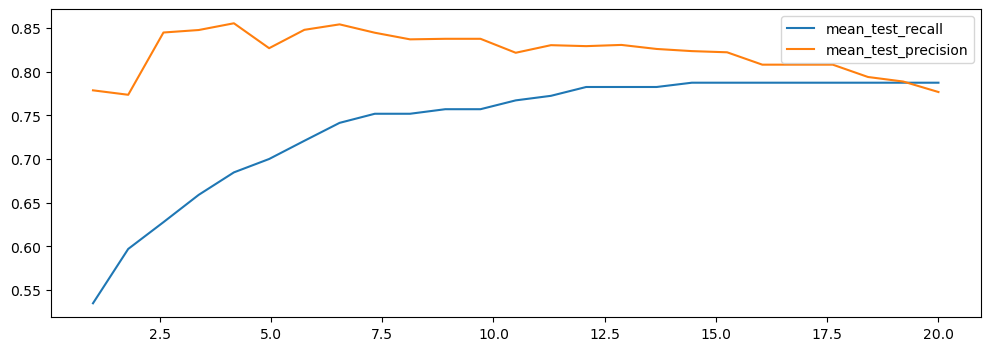

In [82]:
plt.figure(figsize=(12,4))
for score in ['mean_test_recall','mean_test_precision']:
    plt.plot([_[1] for _ in df['param_class_weight']],
            df[score],
            label = score)
plt.legend()

### Class weight on x-axis and scores on y-axis . 
Cross validation gets a chance to optimize either for precision or recall -> F1 score

In [85]:
# Time to create a new metric

def min_recall_precision(y_true,y_pred):
    recall = recall_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred)

    return min(recall,precision)

In [90]:
# testing different things

grid = GridSearchCV(
    estimator = LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0:1,1:v}for v in np.linspace(1,20,25)]},
    scoring = {'precision': make_scorer(precision_score) , 
               'recall' :make_scorer(recall_score),
               'min_recall_precision': make_scorer(min_recall_precision)},                                                       # keep track of both 
    refit='min_recall_precision',                                                  # optimize precision
    return_train_score=True,
    cv = 12,
    n_jobs = -1
)

grid.fit(X,y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

GridSearchCV(cv=12, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.7916666666666665},
                                          {0: 1, 1: 2.583333333333333},
                                          {0: 1, 1: 3.375},
                                          {0: 1, 1: 4.166666666666666},
                                          {0: 1, 1: 4.958333333333333},
                                          {0: 1, 1: 5.75},
                                          {0: 1, 1: 6.541666666666666},
                                          {0: 1, 1: 7.333333333333333},
                                          {0: 1, 1: 8.125},
                                          {0: 1, 1: 8.916666666666666},
                                          {0: 1, 1: 9.7083...
                                          {0: 1, 1: 17.625},
                                          {0: 1, 1: 18.416666666666664},
                                          {0: 1, 1: 19.208333333333332},
                                          {0: 1, 1: 20.0}]},
             refit='min_recall_precision', return_train_score=True,
             scoring={'min_recall_precision': make_scorer(min_recall_precision, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [91]:
df =pd.DataFrame(grid.cv_results_)

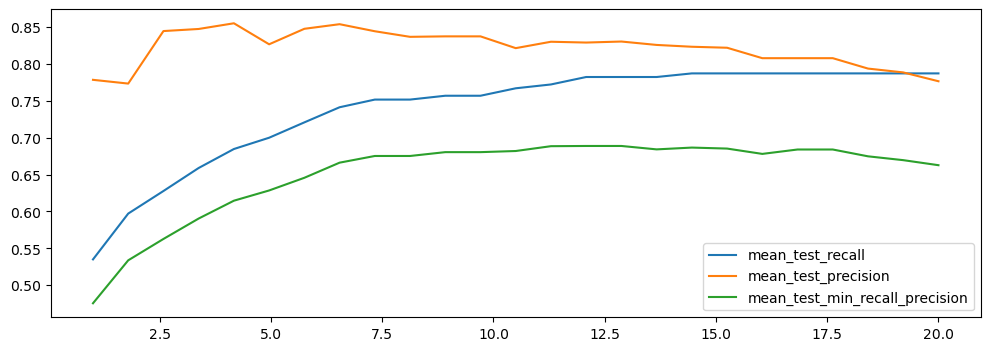

In [94]:
plt.figure(figsize=(12,4))
for score in ['mean_test_recall','mean_test_precision','mean_test_min_recall_precision']:
    plt.plot([_[1] for _ in df['param_class_weight']],
            df[score],
            label = score)
plt.legend()

### What about make_scorer?

In [97]:
s= make_scorer(min_recall_precision)
??s

Signature:       s(estimator, X, y_true, sample_weight=None, **kwargs)
Type:            _Scorer
String form:     make_scorer(min_recall_precision, response_method='predict')
File:            /opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py
Source:         
class _Scorer(_BaseScorer):
    def _score(self, method_caller, estimator, X, y_true, **kwargs):
        """Evaluate the response method of `estimator` on `X` and `y_true`.

        Parameters
        ----------
        method_caller : callable
            Returns predictions given an estimator, method name, and other
            arguments, potentially caching results.

        estimator : object
            Trained estimator to use for scoring.

        X : {array-like, sparse matrix}
            Test data that will be fed to clf.decision_function or
            clf.predict_proba.

        y_true : array-like
            Gold standard target values for X. These must be class labels,
            not decision fun

f(y_true,y_pred) -> s(est,X,y,w) -> This is what make_scorer is making